In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
Ls = np.array(
    [
        [8, 32, 32, 32],
        [8, 40, 40, 40],
        [8, 48, 48, 48],
        [8, 56, 56, 56],
        [8, 64, 64, 64],
    ]
)

# Set plotting options
plt.rcParams["font.size"] = "10"
plt.rcParams["figure.figsize"] = (5, 5)
cmap = matplotlib.colormaps["viridis"]
cm_subsection = np.array(np.linspace(0, 200, len(Ls)), dtype=int)
colors = [cmap.colors[x] for x in cm_subsection]
fmt = ["_", "*", "p", "D", "^", "s", "o"]
markersize = 15
capsize = 4

# Number of lattice sites = volume
vol_tot = np.prod(Ls, axis=1, dtype=np.float64)

# spatial volume
vol = np.prod(Ls[:,1:], axis=1, dtype=np.float64)

# Number of Samples
N = 400

# Set number of bootstraps and random seed
N_bootstraps = 2000
bootstrap_seed = 99781

# Literature critical beta 6.0625(18)
literature_beta = 6.0625
lit_beta_min = 6.0607
lit_beta_max = 6.0643

In [5]:
# Beta values for each lattice size
betas = [
    np.array(
        [
            5.1, 5.3, 5.4, 5.5, 5.6, 
            5.8000, 5.85, 5.9000, 5.95, 6.0000, 
            6.0300, 6.03500, 6.0400, 6.0450, 6.0545, 6.0565, 6.0585, 6.0625, 6.0645, 6.0665, 6.0700, 6.0750, 6.0800, 
            6.2
        ]
    ),
    np.array(
        [
            6.0300, 6.0400, 6.0500, 6.0550, 6.0585, 6.0625, 6.0645, 6.0665, 6.0700, 6.0800, 6.1000,
        ]
    ),
    np.array(
        [
            6.0300, 6.0400, 6.0500, 6.0550, 6.0585, 6.0600, 6.0625, 6.0645, 6.0665, 6.0700, 6.0800, 6.1000,
        ]
    ),
    np.array(
        [
            6.0500, 6.0550, 6.0580, 6.0590, 6.0600, 6.0610, 6.0620, 6.0625, 6.0630, 6.0640, 6.0670, 6.0700,
        ]
    ),
    np.array(
        [
            6.0580, 6.0590, 6.0600, 6.0610, 6.0615, 6.0620, 6.0623, 6.0625, 6.0628, 6.0630, 6.0640, 6.0670, 
        ]
    ),
]

In [7]:
h = []
for l in range(len(Ls)):
    h_l = []
    for b in betas[l]:
        # Load Betti number csv file
        filename = f"../data/observables/betti/{Ls[l][0]}.{Ls[l][1]}.{Ls[l][2]}.{Ls[l][3]}/betti_NtNsNsNs={Ls[l][0]}{Ls[l][1]}{Ls[l][2]}{Ls[l][3]}_b={b:.4f}.csv"
        # print(filename)
        if os.path.exists(filename):
            h_b = np.loadtxt(filename, delimiter=",", dtype=int)
        h_l.append(h_b)
    h.append(h_l)

In [8]:
# Error bars are computed via the bootstrapping method

# Generate bootstraps
np.random.seed(bootstrap_seed)
bootstraps = [
    [
        [
            np.sort(np.random.choice(range(N), size=N, replace=True))
            for i in range(N_bootstraps)
        ]
        for b in range(len(betas[l]))
    ]
    for l in range(len(Ls))
]

In [9]:
os.makedirs(f"../reports/Nt={Ls[0,0]}/figures/", exist_ok=True)

$\rho_{0}$

In [10]:
# Generate b0 bootstrap distribution
b0_bootstrap = [
    [
        np.array([h[l][b][bootstraps[l][b][i]][:, 0] for b in range(len(betas[l]))])
        for l in range(len(Ls))
    ]
    for i in range(N_bootstraps)
]

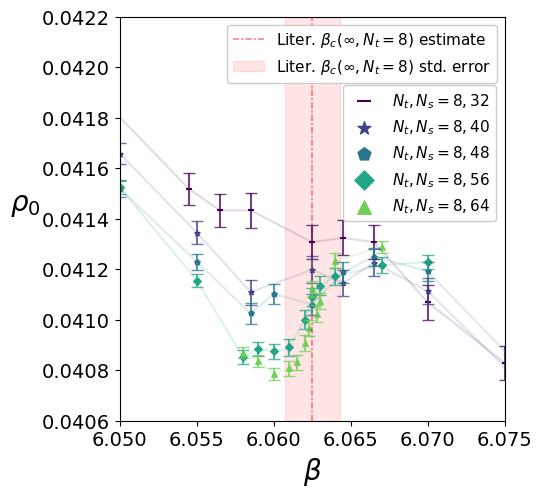

In [11]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 0], axis=1) / vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    means = [
        np.mean(b0_bootstrap[i][l] / vol[l], axis=1)  for i in range(len(b0_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\rho_{0}$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper right',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.56, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5,
    framealpha=1.0
)
ax.add_artist(leg1)

plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([6.050, 6.075])
plt.ylim([0.0406, 0.0422])

plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/p_0_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

In [18]:
# plt.axvline(literature_beta, color="r", alpha=0.25, label="literature value")
# plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label="literature value")

# for l in range(len(Ls)):
#     x = betas[l]
#     temp = np.array(h[l])
#     y = np.var(temp[:, :, 0] / vol[l] , axis=1) * vol[l]
#     plt.scatter(
#         x,
#         y,
#         s=markersize,
#         marker=fmt[l],
#         label=r"$Nt, Ns = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
#         color=colors[l],
#     )
#     vars = [
#         np.var(b0_bootstrap[i][l] / vol[l] , axis=1) * vol[l]  for i in range(len(b0_bootstrap))
#     ]
#     yerr = np.std(vars, axis=0)
#     plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.25)

# plt.xlabel(r"$\beta$")
# plt.ylabel(r"$\chi_{0}$")
# plt.legend(loc="best")
# plt.tight_layout()
# plt.locator_params(axis="x", nbins=10)

# plt.xlim([6.04,6.08])
# plt.ylim([0.04,0.14])

# plt.show()

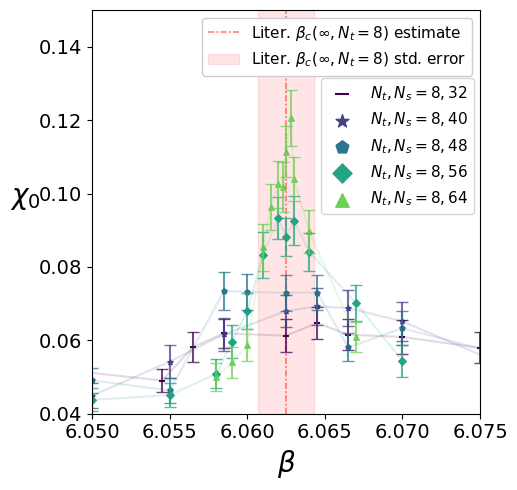

In [12]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 0] / vol[l] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    vars = [
        np.var(b0_bootstrap[i][l] / vol[l] , axis=1) * vol[l]  for i in range(len(b0_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel("$\chi_{0}$",fontsize=20,rotation=0,labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper right',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.57, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([6.050,6.075])
plt.ylim([0.04,0.15])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X_0_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

$\rho_{1}$

In [13]:
# Generate b1 bootstrap distribution
b1_bootstrap = [
    [
        np.array([h[l][b][bootstraps[l][b][i]][:, 1] for b in range(len(betas[l]))])
        for l in range(len(Ls))
    ]
    for i in range(N_bootstraps)
]

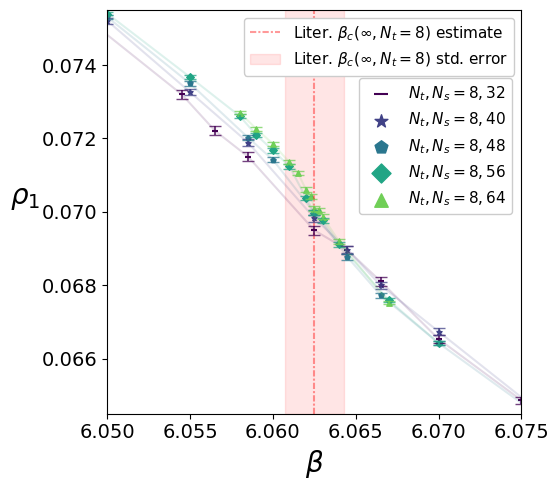

In [14]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 1], axis=1) / vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    means = [
        np.mean(b1_bootstrap[i][l] / vol[l], axis=1)  for i in range(len(b1_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\rho_{1}$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper right',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.59, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5,
    framealpha=1.0
)
ax.add_artist(leg1)

plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([6.050,6.075])
plt.ylim([0.0645,0.0755])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/p_1_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

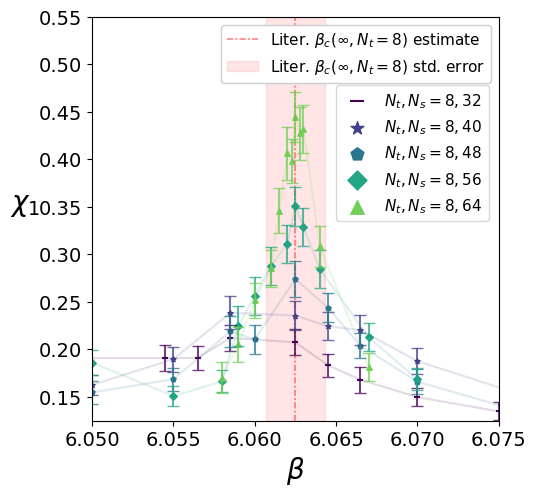

In [15]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 1] / vol[l] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    vars = [
        np.var(b1_bootstrap[i][l] / vol[l] , axis=1) * vol[l]  for i in range(len(b1_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel("$\chi_{1}$",fontsize=20,rotation=0,labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper right',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.58, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([6.050,6.075])
plt.ylim([0.125,0.55])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X_1_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

$\lambda$

In [16]:
# Generate b1 bootstrap distribution
ratio01_bootstrap = [
    [
        np.array([(h[l][b][bootstraps[l][b][i]][:, 0] / h[l][b][bootstraps[l][b][i]][:, 1]) for b in range(len(betas[l]))])
        for l in range(len(Ls))
    ]
    for i in range(N_bootstraps)
]

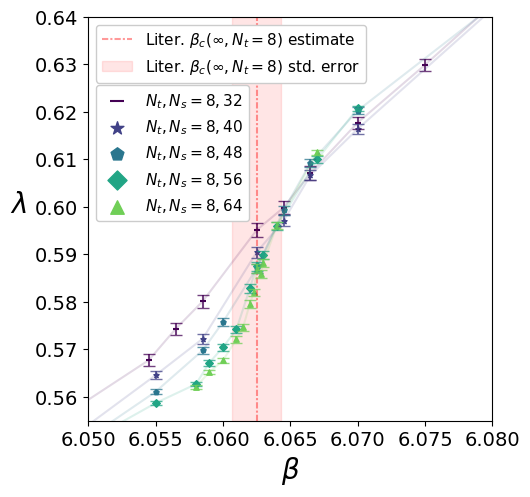

In [17]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 0] / temp[:, :, 1], axis=1)
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    means = [
        np.mean(ratio01_bootstrap[i][l], axis=1)  for i in range(len(ratio01_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\lambda$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.0, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5,
    framealpha=1.0
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([6.050, 6.080])
plt.ylim([0.555, 0.64])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/r01_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

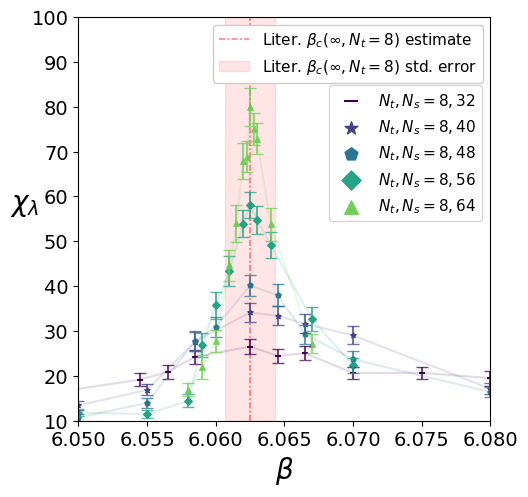

In [18]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 0] / temp[:, :, 1] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    vars = [
        np.var(ratio01_bootstrap[i][l], axis=1) * vol[l] for i in range(len(ratio01_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\chi_{\lambda}$",fontsize=20,rotation=0,labelpad=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper right',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.59, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([6.05, 6.080])
plt.ylim([10,100])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X01_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

C:\Users\2237451\AppData\Local\Temp\ipykernel_44328\3225075074.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


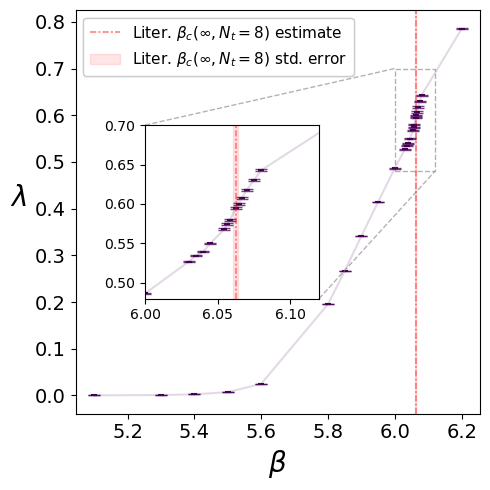

In [20]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(1):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 0] / temp[:, :, 1], axis=1)
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        color=colors[l],
    )
    means = [
        np.mean(ratio01_bootstrap[i][l], axis=1)  for i in range(len(ratio01_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\lambda$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()

axins = inset_axes(ax, width="43%", height="43%", loc='center left', borderpad=5)

axins.plot(x, y, color=colors[0], alpha=0.15)
axins.scatter(x, y, s=markersize, marker=fmt[0], color=colors[0])
axins.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[0], alpha=0.75)

axins.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)))
axins.axvspan(xmin=lit_beta_min, xmax=lit_beta_max, color="r", alpha=0.1)

xlo, xhi = 6.00, 6.12
axins.set_xlim(xlo, xhi)
axins.set_ylim(0.48, 0.7)
axins.set_xticks([6.0,6.05,6.10])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=1, linestyle="--", alpha=0.6)

handles, labels = ax.get_legend_handles_labels()
leg1 = ax.legend(
    handles, labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/r01_scatter_wide.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

C:\Users\2237451\AppData\Local\Temp\ipykernel_44328\1884701323.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


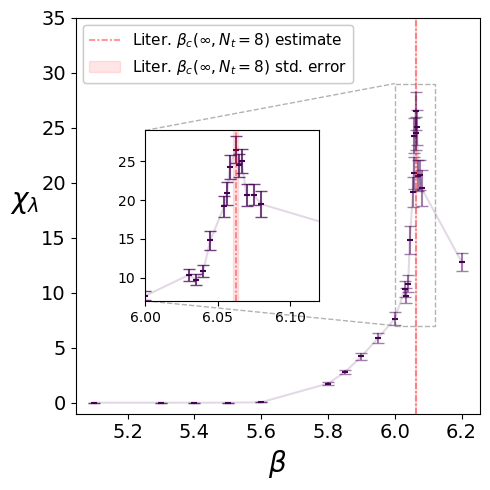

In [21]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(1):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 0] / temp[:, :, 1] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        color=colors[l],
    )
    vars = [
        np.var(ratio01_bootstrap[i][l], axis=1) * vol[l] for i in range(len(ratio01_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.5)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\chi_{\lambda}$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([-1.0,35])

ax = plt.gca()
axins = inset_axes(ax, width="43%", height="43%", loc='center left', borderpad=5)
axins.plot(x, y, color=colors[0], alpha=0.15)
axins.scatter(x, y, s=markersize, marker=fmt[0], color=colors[0])
axins.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[0], alpha=0.75)
axins.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)))
axins.axvspan(xmin=lit_beta_min, xmax=lit_beta_max, color="r", alpha=0.1)
xlo, xhi = 6.00, 6.12
axins.set_xlim(xlo, xhi)
axins.set_ylim(7, 29)
axins.set_xticks([6.0,6.05,6.10])
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5", linewidth=1, linestyle="--", alpha=0.6)

handles, labels = ax.get_legend_handles_labels()
leg1 = ax.legend(
    handles, labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
ax.add_artist(leg1)

plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X01_scatter_wide.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()